## installing nltk

In [1]:
!pip install -U nltk

## corpora

In [2]:
import nltk

# download the big collections to default /root/nltk_data
nltk.download('all-corpora')
nltk.download('all-nltk')
nltk.download('book')
nltk.download('popular')
nltk.download('tests')


[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | D

True

In [3]:
from nltk.corpus import names

print(names.words()[:10])

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


In [4]:
print(len(names.words()))

7944


## Tokenization


Tokens composed of one word are also called unigrams in computational linguistics; bigrams are
composed of two consecutive words; trigrams of three consecutive words; and n-grams of n consec-
utive words. Here is an example of tokenization:

In [5]:
from nltk.tokenize import word_tokenize
sent = '''I am reading a book.
    It is Python Machine Learning By Example,
    4th edition.'''

print(word_tokenize(sent))

['I', 'am', 'reading', 'a', 'book', '.', 'It', 'is', 'Python', 'Machine', 'Learning', 'By', 'Example', ',', '4th', 'edition', '.']


You might think word tokenization is simply splitting a sentence by space and punctuation. Here’s an
interesting example showing that tokenization is more complex than you think:

In [6]:
sent2 = 'I have been to U.K. and U.S.A.'
print(word_tokenize(sent2))

['I', 'have', 'been', 'to', 'U.K.', 'and', 'U.S.A', '.']


In [7]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### SpaCy also has an outstanding tokenization feature. It uses an accurately trained model that is con-stantly updated. To install it, we can run the following command:

In [8]:
# Install spaCy if not already
!pip install -U spacy

# Download the small English model
!python -m spacy download en_core_web_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')
tokens2 = nlp(sent2)
print([token.text for token in tokens2])

['I', 'have', 'been', 'to', 'U.K.', 'and', 'U.S.A.']


We can also segment text based on sentences. For example, in the same input text, using the sent_
tokenize function from NLTK, we have the following commands:

In [10]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(sent))

['I am reading a book.', 'It is Python Machine Learning By Example,\n    4th edition.']


## PoS tagging

off-the-shelf tagger from NLTK

It is easy to directly use the built-in tagging function,

it is actually a prediction from a pre-built supervised learning
model. The model is trained based on a large corpus composed of words that are correctly tagged.

In [11]:
import nltk
tokens = word_tokenize(sent)
print(nltk.pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('reading', 'VBG'), ('a', 'DT'), ('book', 'NN'), ('.', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('Python', 'NNP'), ('Machine', 'NNP'), ('Learning', 'NNP'), ('By', 'IN'), ('Example', 'NNP'), (',', ','), ('4th', 'CD'), ('edition', 'NN'), ('.', '.')]


To understand Tags

In [12]:
nltk.help.upenn_tagset('PRP')
nltk.help.upenn_tagset('VBP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us
VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...


In spaCy, getting a PoS tag is also easy. The token object parsed from an input sentence has an attribute
called pos_, which is the tag we are looking for. Let’s print pos_ for each token, as follows:

In [13]:
print([(token.text, token.pos_) for token in tokens2])

[('I', 'PRON'), ('have', 'AUX'), ('been', 'AUX'), ('to', 'ADP'), ('U.K.', 'PROPN'), ('and', 'CCONJ'), ('U.S.A.', 'PROPN')]


## NER

NER task is to locate and identify words or phrases that are of definitive
categories,

such as names of persons, companies, locations, and dates


In [14]:
tokens3 = nlp('The book written by Hayden Liu in 2024 was sold at $30 in America')

In [15]:
print([(token_ent.text, token_ent.label_) for token_ent in tokens3.ents])

[('Hayden Liu', 'PERSON'), ('2024', 'DATE'), ('30', 'MONEY'), ('America', 'GPE')]


Please refer to https://spacy.io/api/annotation#section-named-entities for a full
list of named entity tags.

## Stemming and lemmatization

**stemming** is a process of reverting an inflected or derived word to its root form. For instance,
machine is the stem of machines, and learning and learned are generated from learn as their stem.

**lemmatization** is a cautious version of stemming. It considers the PoS of a word when
conducting stemming.


1. Import porter as one of the three built-in stemming algorithms (LancasterStemmer and
SnowballStemmer are the other two) and initialize the stemmer as follows:

In [16]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

2. Stem machines and learning, as shown in the following code:

In [17]:
print(porter_stemmer.stem('machines'))

porter_stemmer.stem('learning')

machin


'learn'

3. Now, import a lemmatization algorithm based on the built-in WordNet corpus and initialize
a lemmatizer:

In [18]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [19]:
print(lemmatizer.lemmatize('machines'))

lemmatizer.lemmatize('learning')

machine


'learning'

 In short: **Lemmatizer needs the right POS tag**. By default → noun, but if you specify `VERB` → it gives `"learn"`.




## Semantics and topic modeling


#### **What is Topic Modeling?**  
- **Goal**: Discover hidden themes (topics) in text documents **without labels** (unsupervised).  
- **Example**: Group e-commerce reviews into topics like "shipping," "quality," or "price."  

#### **Why Use Gensim?**  
- **Specializes in**: Semantic analysis & topic modeling (great for text mining).  
- **Key Features**:  
  1. **Topic Modeling**: Finds word patterns (e.g., LDA, LSI algorithms).  
  2. **Word Embeddings**: Represents words as vectors (e.g., Word2Vec).  
  3. **Similarity Queries**: Finds similar words/documents (uses embeddings).  
  4. **Scalability**: Handles millions of documents (supports distributed computing).  

#### **How It Works**  
1. **Input**: Raw text (e.g., product reviews, news articles).  
2. **Output**:  
   - Topics (e.g., "Topic 1: shipping, delivery, fast").  
   - Word vectors (for similarity searches).  

#### **Complementary Tools**  
- **scikit-learn**: Handles text preprocessing (tokenization) + has built-in datasets (e.g., 20 newsgroups).  

---  
**Key Takeaway**: Use **Gensim** for topic modeling & word embeddings, and **scikit-learn** for text prep. Perfect for analyzing reviews, articles, or any unstructured text!  

### Getting the newsgroups data


In [20]:
from sklearn.datasets import fetch_20newsgroups

In [21]:
groups = fetch_20newsgroups()

### Exploring the newsgroups data

In [22]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

The target_names key gives the 20 newsgroups names:

In [23]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

The target key corresponds to a newsgroup, but is encoded as an integer:

In [24]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

Then, what are the distinct values for these integers? We can use the unique function from NumPy
to figure it out:

In [25]:
import numpy as np
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [26]:
!pip install seaborn
!pip install matplotlib

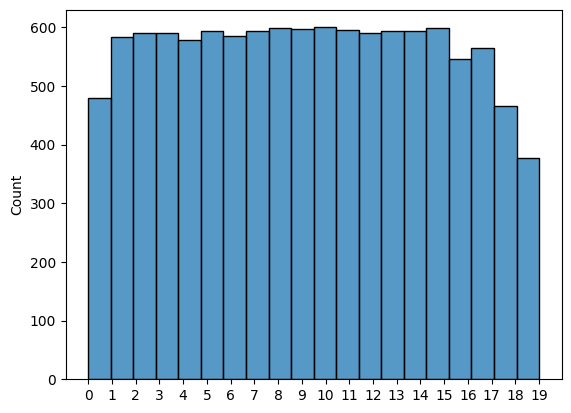

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(groups.target, bins= 20)
plt.xticks(range(0, 20, 1))
plt.show()

Now, let’s have a look at the first document and its topic number and name by executing the following
command:

In [28]:
groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [29]:
groups.target[0]

np.int64(7)

In [30]:
groups.target_names[groups.target[0]]

'rec.autos'

### Thinking about features for text data

#### **Key Idea**  
To identify if a document belongs to a specific category (e.g., **`rec.autos`**), focus on **key words** like:  
- **`car`**, **`doors`**, **`bumper`** → Strong signals for auto-related content.  

#### **How to Use These Words as Features**  
1. **Boolean Features**:  
   - Check if a word **exists** in the document (`1` if present, `0` if absent).  
   - Example: `"car" in document? → 1 (True)`.  

2. **Word Counts**:  
   - Track **how often** key words appear (e.g., `car` appears 5x → stronger signal).  
   - More occurrences = higher relevance to the topic.  

#### **Why It Works**  
- **Topic-Specific Vocabulary**: Certain words (like `car`) are strong indicators of a document’s theme.  
- **Simple but Effective**: Even basic features (presence/count) can boost classifier accuracy.  

---  
**Key Takeaway**: For text classification (e.g., newsgroups), start by extracting **word presence/frequency** of domain-specific terms.  


### Counting the occurrence of each word token

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

Text vectorization (e.g., `CountVectorizer` or `TfidfVectorizer`):

| Parameter      | Default Value | Example Values               | Description |
|----------------|---------------|-------------------------------|-------------|
| **ngram_range** | (1,1)         | (1,2), (2,2)                 | Controls the range of n-grams extracted:<br>• (1,1) = single words (unigrams)<br>• (1,2) = unigrams + word pairs (bigrams)<br>• (2,2) = only bigrams |
| **stop_words**  | None          | 'english', ['a','the'], None  | Specifies words to ignore:<br>• 'english' = built-in English stopwords<br>• Custom list (e.g., ['a','the'])<br>• None = keep all words |
| **lowercase**   | True          | True, False                   | If `True`, converts all text to lowercase before processing (recommended for most cases). |
| **max_features**| None          | None, 200, 500                | Limits vocabulary size:<br>• None = keep all words<br>• 200 = use only top 200 most frequent words |
| **binary**      | False         | True, False                   | If `True`, counts become binary (1 if word exists, 0 otherwise)<br>• Useful for presence/absence analysis instead of frequency. |

### Key Notes:
- **ngram_range**: Use (1,2) to capture phrases (e.g., "new car").
- **stop_words**: Remove common words to reduce noise (e.g., "the", "and").
- **binary**: Set to `True` for binary classification tasks where word frequency matters less.

This table helps quickly reference parameters when preprocessing text data for machine learning.

We first initialize the count vectorizer with the 500 top features (500 most frequent tokens):

In [32]:
count_vector = CountVectorizer(max_features=500)

In [33]:
data_count = count_vector.fit_transform(groups.data)

In [34]:
data_count

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 798221 stored elements and shape (11314, 500)>

In [35]:
data_count[0]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 53 stored elements and shape (1, 500)>

In [36]:
data_count.toarray()

array([[0, 0, 0, ..., 0, 2, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
data_count.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [38]:
print(count_vector. get_feature_names_out())

['00' '000' '10' '100' '11' '12' '13' '14' '145' '15' '16' '17' '18' '19'
 '1993' '20' '21' '22' '23' '24' '25' '26' '27' '30' '32' '34' '40' '50'
 '93' 'a86' 'able' 'about' 'above' 'ac' 'access' 'actually' 'address'
 'after' 'again' 'against' 'ago' 'all' 'already' 'also' 'always' 'am'
 'american' 'an' 'and' 'andrew' 'another' 'answer' 'any' 'anyone'
 'anything' 'apple' 'apr' 'april' 'are' 'armenian' 'around' 'article' 'as'
 'ask' 'at' 'au' 'available' 'away' 'ax' 'b8f' 'back' 'bad' 'based' 'be'
 'because' 'been' 'before' 'being' 'believe' 'best' 'better' 'between'
 'bible' 'big' 'bill' 'bit' 'book' 'both' 'but' 'buy' 'by' 'ca' 'call'
 'called' 'came' 'can' 'canada' 'cannot' 'car' 'card' 'case' 'cc' 'center'
 'change' 'children' 'chip' 'christian' 'clipper' 'co' 'code' 'color'
 'com' 'come' 'computer' 'control' 'could' 'course' 'cs' 'current' 'data'
 'david' 'day' 'days' 'de' 'department' 'did' 'didn' 'different' 'disk'
 'distribution' 'do' 'does' 'doesn' 'doing' 'don' 'done' 'dos' 'do

Our first trial doesn’t look perfect. Obviously, the most popular tokens are numbers, or letters with
numbers such as a86, which do not convey important information. Moreover, there are many words
that have no actual meaning, such as you, the, them, and then. Also, some words contain identical
information, for example, tell and told, use and used, and time and times. Let’s tackle these issues.

### Text preprocessing

In [39]:
data_cleaned = []
for doc in groups.data :
  data_cleaned = ' '.join(word for word in doc.split() if word.isalpha())
  data_cleaned = data_cleaned.lower()

### Dropping stop words

There’s no universal list of stop words. Hence, depending on the tools or packages you are using, you
will remove different sets of stop words. Take scikit-learn as an example—you can check the list that
follows:

In [40]:
from sklearn.feature_extraction import _stop_words
print(_stop_words.ENGLISH_STOP_WORDS)

frozenset({'hasnt', 'afterwards', 'thence', 'latter', 'whereupon', 'whole', 'who', 'during', 'throughout', 'third', 'un', 'under', 'fire', 'together', 'above', 'amount', 'each', 'across', 'ten', 'meanwhile', 'might', 'onto', 'sincere', 'elsewhere', 'made', 'yet', 'found', 'eg', 'twenty', 'they', 'someone', 'fill', 'mill', 'upon', 'etc', 'then', 'get', 'beforehand', 'yourselves', 'everyone', 'i', 'except', 'move', 'that', 'around', 'system', 'ours', 'namely', 'within', 'because', 'empty', 'per', 'go', 'nobody', 'on', 'whereby', 'please', 'via', 'sometime', 'therein', 'without', 'anyone', 'indeed', 'whither', 'four', 'something', 'nevertheless', 'name', 'will', 'yourself', 'the', 'noone', 'mostly', 'fifty', 'somehow', 'whereas', 'interest', 'any', 'couldnt', 'everywhere', 'full', 'always', 'her', 'toward', 'should', 'although', 'else', 'be', 'hereby', 'also', 'eleven', 'which', 'cannot', 'nowhere', 'many', 'amongst', 'beyond', 'eight', 'sixty', 'serious', 'both', 'but', 'becoming', 'show

To drop stop words from the newsgroups data, we simply just need to specify the stop_words parameter:

In [41]:
count_vector_sw = CountVectorizer(stop_words="english", max_features=500)

Besides stop words, you may notice that names are included in the top features, such as andrew. We
can filter names with the Names corpus from NLTK we just worked with.

### Reducing inflectional and derivational forms of words

### **Stemming vs. Lemmatization**  
- **Stemming**: Fast but crude (e.g., "trying" → "tri").  
- **Lemmatization**: Slower but accurate (e.g., "trying" → "try").  

### **NLP Pipeline**  
1. Clean text → remove stop words → lemmatize/stem → vectorize.  
2. **Trade-off**: Speed (stemming) vs. accuracy (lemmatization).  

*(Key: Preprocess before converting text to numbers.)*

In [42]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import names
from sklearn.feature_extraction.text import CountVectorizer

lemmatizer = WordNetLemmatizer()
all_names = set(names.words())

def get_cleaned_data(groups, lemmatizer, remove_words):
  data_cleaned = []
  for doc in groups.data :
    doc = doc.lower()

    doc_cleaned = ' '.join(lemmatizer.lemmatize(word)
                            for word in doc.split()
                            if word.isalpha() and word not in remove_words)

    data_cleaned.append(doc_cleaned)

  return data_cleaned

count_vector_sw = CountVectorizer(stop_words="english", max_features=500)

data_cleaned = get_cleaned_data(groups, lemmatizer, all_names)
data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)

Now the features are much more meaningful:

In [43]:
print(count_vector_sw.get_feature_names_out())

['able' 'accept' 'access' 'according' 'act' 'action' 'actually' 'add'
 'address' 'ago' 'agree' 'algorithm' 'allow' 'american' 'anonymous'
 'answer' 'anybody' 'apple' 'application' 'apr' 'april' 'arab' 'area'
 'argument' 'armenian' 'article' 'ask' 'asked' 'assume' 'atheist' 'attack'
 'attempt' 'available' 'away' 'bad' 'based' 'belief' 'believe' 'best'
 'better' 'bible' 'big' 'bike' 'bit' 'black' 'board' 'body' 'book' 'box'
 'build' 'bus' 'buy' 'ca' 'california' 'called' 'came' 'canada' 'car'
 'card' 'care' 'carry' 'case' 'cause' 'center' 'certain' 'certainly'
 'chance' 'change' 'check' 'child' 'chip' 'christian' 'church' 'city'
 'claim' 'clear' 'clinton' 'clipper' 'code' 'college' 'color' 'come'
 'coming' 'command' 'comment' 'common' 'communication' 'company'
 'computer' 'consider' 'considered' 'contact' 'control' 'copy' 'cost'
 'country' 'couple' 'course' 'create' 'crime' 'current' 'cut' 'data'
 'david' 'day' 'db' 'deal' 'death' 'department' 'device' 'did'
 'difference' 'different' 'di

Text → Numbers: Newsgroup docs turned into 500-dim vectors (word counts).

Top 500 Words: Selected after cleaning, stopword removal, and lemmatization.

Big Question: Do these counts distinguish topics well? (Answer coming next.)

## Visualizing the newsgroups data with t-SNE

If same-topic docs cluster in 2D/3D after t-SNE reduces 500D vectors, our text-to-numbers worked!

### What is dimensionality reduction?

**Core Purpose**
- Simplifies high-dimensional data while preserving key information
- Solves the "curse of dimensionality" for visualization and analysis

**Key Methods**
1. **PCA (Linear)**
   - Finds axes of maximum variance
   - Preserves global structure

2. **t-SNE (Nonlinear)**
   - Focuses on local relationships
   - Excellent for visualization clusters

3. **NMF**
   - Extracts interpretable components
   - Useful for topic modeling

**Why It Matters**
- Visualizes complex data (500D → 2D/3D)
- Removes redundant features
- Speeds up computation
- Reveals hidden patterns

**Nature of Technique**
- Primarily unsupervised (no labels needed)
- Transforms features rather than selecting subsets

This compression enables us to work with high-dimensional data like text vectors while maintaining meaningful patterns.

### t-SNE for dimensionality reduction

**t-SNE in a Nutshell**
1. **What it does**:
   - Takes high-dimensional data (like 500D text vectors)
   - Maps it to 2D/3D while preserving local relationships

2. **Key features**:
   - Non-linear technique (captures complex patterns)
   - Focuses on keeping similar points close together
   - Uses probability distributions to model relationships

3. **How it works**:
   - Step 1: Calculates pairwise similarities in original space (Gaussian)
   - Step 2: Recreates these relationships in lower dimension (t-distribution)
   - Step 3: Optimizes until the two distributions match as closely as possible

**Why it's special**:
- Particularly good at revealing clusters
- Handles non-linear relationships that PCA can't
- The t-distribution prevents "crowding" of points in the visualization

**Best used for**:
- Visualizing high-dimensional data
- Exploring patterns and groupings
- Preliminary data analysis

**Limitations**:
- Computationally intensive
- Results can vary with different parameter settings
- Distances in the plot don't preserve actual magnitudes

This technique helps us "see" whether our 500D text vectors actually group by topic when compressed to 2D.

In [44]:
from sklearn.manifold import TSNE

In [45]:
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']
groups_3 = fetch_20newsgroups(subset='train', categories=categories_3)
data_cleaned = get_cleaned_data(groups_3, lemmatizer, all_names)
data_cleaned_count_3 = count_vector_sw.fit_transform(data_cleaned)

we apply t-SNE to reduce the 500-dimensional matrix to a two-dimensional matrix:

In [46]:
tsne_model = TSNE(
    n_components=2,      # Reduce to 2 dimensions for visualization
    perplexity=40,       # Balances local/global structure (typical: 5-50)
    random_state=42,     # Seed for reproducible results
    learning_rate=500    # Optimization speed (typical: 10-1000)
)

data_tsne = tsne_model.fit_transform(data_cleaned_count.toarray())


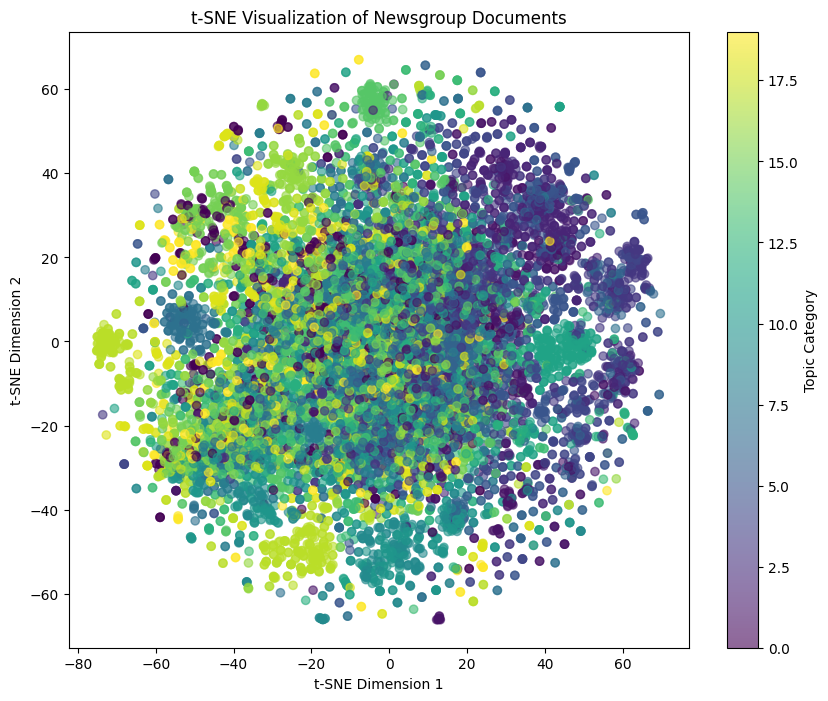

In [48]:
# Create scatter plot with color-coded true labels
plt.figure(figsize=(10, 8))
plt.scatter(
    data_tsne[:, 0],   # First t-SNE dimension (x-axis)
    data_tsne[:, 1],   # Second t-SNE dimension (y-axis)
    c=groups.target, # Color points by true category
    alpha=0.6,         # Slight transparency for overlapping points
    cmap='viridis'     # Color palette
)

# Add plot formatting
plt.title('t-SNE Visualization of Newsgroup Documents')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Topic Category')

# Display the plot
plt.show()

In [49]:
categories_5 = ['comp.graphics', 'comp.os.ms-windows.misc',
                'comp.sys.ibm.pc.hardware',
                'comp.sys.mac.hardware', 'comp.windows.x']

groups_5 = fetch_20newsgroups(categories=categories_5)

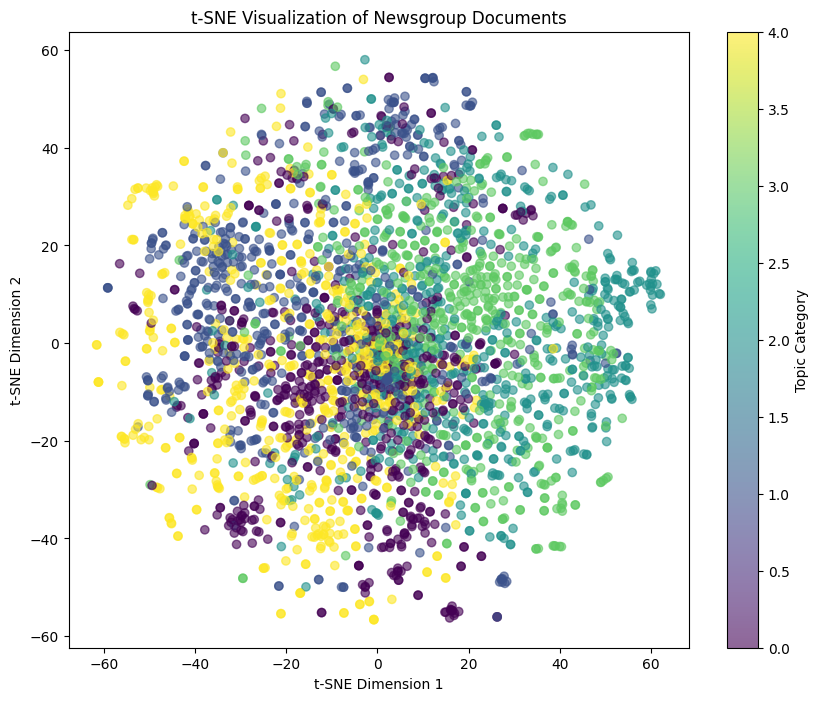

In [50]:
# Clean and vectorize the data for the selected categories
data_cleaned_5 = get_cleaned_data(groups_5, lemmatizer, all_names)
data_cleaned_count_5 = count_vector_sw.fit_transform(data_cleaned_5)

# Apply t-SNE to reduce the dimensionality
tsne_model_5 = TSNE(
    n_components=2,      # Reduce to 2 dimensions for visualization
    perplexity=40,       # Balances local/global structure (typical: 5-50)
    random_state=42,     # Seed for reproducible results
    learning_rate=500    # Optimization speed (typical: 10-1000)
)

data_tsne_5 = tsne_model_5.fit_transform(data_cleaned_count_5.toarray())

# Create scatter plot with color-coded true labels
plt.figure(figsize=(10, 8))
plt.scatter(
    data_tsne_5[:, 0],   # First t-SNE dimension (x-axis)
    data_tsne_5[:, 1],   # Second t-SNE dimension (y-axis)
    c=groups_5.target, # Color points by true category
    alpha=0.6,         # Slight transparency for overlapping points
    cmap='viridis'     # Color palette
)

# Add plot formatting
plt.title('t-SNE Visualization of Newsgroup Documents')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Topic Category')

# Display the plot
plt.show()

## Representing words with dense vectors – word embedding

#####  **Word Count vs. Word Embeddings**  

| Feature               | **Word Count (Bag-of-Words)** | **Word Embeddings** |
|----------------------|-----------------------------|-------------------|
| **Vector Type**      | Sparse (mostly zeros)       | Dense (all values meaningful) |
| **Dimensionality**   | High (e.g., 500–1M+ dimensions) | Low (e.g., 50–300 dimensions) |
| **Semantics**        | ❌ No meaning (just counts)  | ✅ Captures word meaning & relationships |
| **Context**          | ❌ Ignores word order       | ✅ Understands word usage in context |
| **Example**          | `{"car": 3, "engine": 2}`   | `car ≈ [0.7, -0.2, 0.5]` (similar to `vehicle`) |

### **Key Takeaways**  
1. **Word Count (BoW)**  
   - Simple but limited (no word meaning).  
   - Suffers from high dimensionality.  
   - Best for quick baseline models.  

2. **Word Embeddings (e.g., Word2Vec, GloVe, FastText)**  
   - Compact & meaningful representations.  
   - Understands synonyms & analogies (e.g., `king - man + woman ≈ queen`).  
   - Used in modern NLP (transformers, RNNs).  

**Next Step?** Try `Word2Vec` or `GloVe` for richer text features! 🚀  

*(Need code examples? Ask!)*

### Building embedding models using shallow neural networks

#### **What Are Word Embeddings?**  
- **Dense vectors** (e.g., `[0.3, -1.2, 4.5]`) representing words in **low-dimensional space** (~100–300 dimensions).  
- **Key Idea**: Words with similar meanings have **geometrically close** vectors (e.g., `king ≈ queen`).  

---

### **How Are They Created?**  
Two neural network approaches:  
1. **CBOW (Continuous Bag of Words)**  
   - Predicts a **target word** from its context (surrounding words).  
   - *Example*: Given `["I", "love", "python", "machine"]`, predict `"reading"`.  

2. **Skip-Gram**  
   - Predicts **context words** from a target word (reverse of CBOW).  
   - *Example*: Given `"reading"`, predict `["I", "love", "python", "machine"]`.  

**Training**:  
- Uses **one-hot encoded** words initially.  
- Final embeddings = **neural network weights**.  

---

### **Why Use Pre-Trained Models?**  
- Training from scratch is **slow** and **expensive**.  
- Popular ready-to-use models:  
  - **GloVe** (Stanford)  
  - **Word2Vec** (Google)  
  - **FastText** (Meta)  

#### **Key Features**:  
- **Semantic Preservation**: Captures word meanings (e.g., `clustering ≈ grouping`).  
- **Document Representation**: Average word vectors for **text classification/clustering**.  

---

### **Visualization Tips**  
- Use **PCA/t-SNE** to reduce dimensions for 2D/3D plots.  
- **Clusters** reveal word relationships (e.g., tech terms grouped together).  

---

### **Key Takeaways**  
✅ **Better than Bag-of-Words**: Captures **meaning** (not just counts).  
✅ **Pre-trained = Efficient**: Skip training, use existing models.  
✅ **Versatile**: Useful for **search, classification, and more**.  


In [51]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

The resulting vectors of document samples are then consumed by downstream predictive tasks, such
as classification, similarity ranking in search engines, and clustering

In [53]:
import gensim.downloader as api
model = api.load("glove-twitter-25")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [54]:
vector = model['computer']
print('Word computer is embedded into:\n', vector)

NameError: name 'model' is not defined

The result is a 25-dimension float vector, as expected.

We can also get the top 10 words that are most contextually relevant to computer using the most_similar
method, as follows:

In [ ]:
similar_words = model.most_similar('computer', topn=10)
print('Top 10 similar words to computer:\n', similar_words)

The result looks promising.
Finally, we demonstrate how to generate embedding vectors for a document with a simple example,
as follows:

In [ ]:
import numpy as np

# Define a sample document as a list of words
doc_sample = ['i', 'love', 'reading', 'python', 'machine','learning', 'by', 'example']

# Calculate the document vector by averaging the word vectors of the words in the document
# This assumes that the 'model' object (a loaded word embedding model like GloVe or Word2Vec)
# is available in the current environment and can provide vectors for each word.
doc_vector = np.mean([model[word] for word in doc_sample], axis=0)

# Print the resulting document vector
print('The document sample is embedded into:\n', doc_vector)

In traditional NLP applications, such as text classification and information retrieval tasks, where word
frequency plays a significant role, word count representation is still an outstanding solution. In more
complicated areas requiring understanding and semantic relationships between words, such as text
summarization, machine translation, and question answering, word embedding is used extensively
and extracts far better features than the traditional approach.